In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
from simulation_parser import parse_simulation_files, SimulationInfo
from dataclasses import dataclass
import numpy as np

@dataclass
class SimpleParticle:
  id: int
  x: float
  left: int
  right: int

In [137]:
#params

save_to = "./sys2-ej2.4.png"
#equidistant!
static_path = "../static30.txt"
dynamic_paths = [
  "../dynamic30.txt",
]

In [138]:
def get_neighbors(siminfo: SimulationInfo):
  neighbors_pairs = []
  particles = []
  init = 0
  for i in range(siminfo.N):
    curr_pos = siminfo.particles[i].position[init][0]
    particles.append(SimpleParticle(i, curr_pos, -1, -1))
  particles.sort(key=lambda p:p.x, reverse=False)
  
  firstP = None
  prevP = None
  currP = None
  for i in range(siminfo.N):
    prevP = currP
    currP = particles[i]

    if firstP == None:
      firstP = currP
    if prevP != None:
      prevP.right = currP.id
      currP.left = prevP.id
  
  if firstP != None and firstP != currP:
    firstP.left = currP.id
    currP.right = firstP.id

  return particles
    

In [139]:
def get_dist(pos1, pos2, boundary):
  dist = abs(pos2 - pos1)
  wrapDist = boundary - dist
  return min(dist, wrapDist)

In [140]:
def get_densities(i: int, simInfo: SimulationInfo, neighborData: list[SimpleParticle]):
  densities_i = []
  instants = simInfo.instants
  j = neighborData[i].left
  k = neighborData[i].right
  
  for t in range(len(instants)):
    pos_i = simInfo.particles[i].position[t][0]
    pos_j = simInfo.particles[j].position[t][0]
    pos_k = simInfo.particles[k].position[t][0]

    d_ij = get_dist(pos_i, pos_j, simInfo.L)
    d_ik = get_dist(pos_i, pos_k, simInfo.L)

    densities_i.append(1/(d_ij + d_ik))

  return densities_i

In [141]:
def get_all_densities(simInfo: SimulationInfo, neighborData: list[SimpleParticle]):
  densities = []
  instants = simInfo.instants
  for i in range(simInfo.N):
    densities_i = get_densities(i, simInfo, neighborData)
    #ro_{i}(t)
    densities.append(densities_i)
  
  return densities

In [142]:
def get_all_velocities(simInfo: SimulationInfo):
  velocities = []
  instants = simInfo.instants
  for i in range(simInfo.N):
    velocities_i = []
    for t in range(len(instants)):
      vel_i = simInfo.particles[i].velocity[t][0]
      velocities_i.append(vel_i)
    #v_{i}(t)
    velocities.append(velocities_i)
  
  return velocities

In [143]:
simInfo = parse_simulation_files(static_path, dynamic_paths[0])
neighborData = get_neighbors(simInfo)

densities = get_all_densities(simInfo, neighborData)
velocities = get_all_velocities(simInfo)

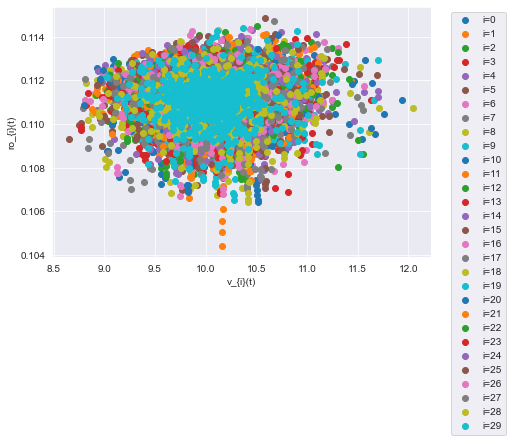

In [144]:
#plot everything at once (no sliding window average)
for i in range(simInfo.N):
  x = np.array(velocities[i])
  y = np.array(densities[i])
  plt.scatter(x,y, label=f'i='+str(i))

sns.set_style("darkgrid")
plt.tight_layout()
plt.xlabel('v_{i}(t)')
plt.ylabel('ro_{i}(t)')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
#plt.show
plt.savefig(save_to, bbox_inches='tight', dpi=1200)